In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Aufgabe 1

## Überprüfung ob man mit einer Geraden die Punkte trennbarsind

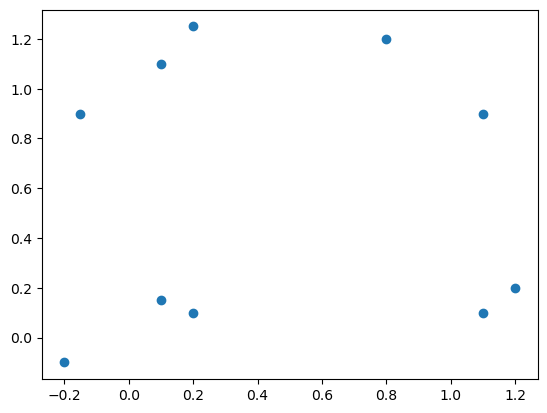

In [2]:
c0 =  [[0.1, -0.2], [0.2, 0.1], [-0.15,0.2], [1.1,0.8], [1.2,1.1]]
c1 =  [1.1, -0.1], [1.25, 0.15], [0.9,0.1], [0.1,1.2], [0.2,0.9]



plt.scatter(c0, c1)
plt.show()

Ergebnis: Ja das sind sie. Es wäre möglich mit einer lineare Diskriminanzanalyse (LDA) dies auch Mathematisch zu Überprüfen/Beweisen. Wenn ich genug Zeit habe, führe ich dies womöglich durch.

In [3]:
c0 = np.array([[0.1, -0.2], [0.2, 0.1], [-0.15, 0.2], [1.1, 0.8], [1.2, 1.1]])
c1 = np.array([[1.1, -0.1], [1.25, 0.15], [0.9, 0.1], [0.1, 1.2], [0.2, 0.9]])
X = np.concatenate((c0, c1))
y = np.concatenate((np.zeros(len(c0)), np.ones(len(c1))))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)
clf.fit(X_train, y_train)


# Vorhersage auf Testdaten
y_pred = clf.predict(X_train)

# Ausgabe der Vorhersagen
print(y_pred)

[1. 0. 1. 0. 0. 0. 0. 1.]


## Visualisierung

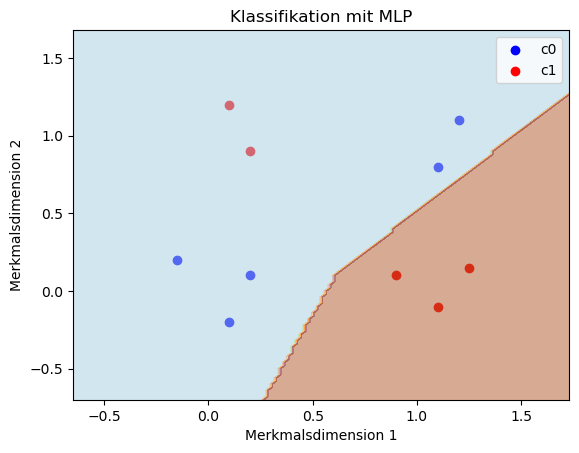

In [4]:


# Plotten der Punkte
plt.scatter(c0[:,0], c0[:,1], color='blue', label='c0')
plt.scatter(c1[:,0], c1[:,1], color='red', label='c1')

# Plotten der Entscheidungsgrenze
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Beschriftung und Legende
plt.xlabel('Merkmalsdimension 1')
plt.ylabel('Merkmalsdimension 2')
plt.title('Klassifikation mit MLP')
plt.legend()

# Anzeigen des Plots
plt.show()